<a href="https://colab.research.google.com/github/code-guru2004/Machine-Learning/blob/main/Machine_Learning_PART_1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [ ]:
df = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/Data Center/insurance.csv')

In [ ]:
df

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520
...,...,...,...,...,...,...,...
1333,50,male,30.970,3,no,northwest,10600.54830
1334,18,female,31.920,0,no,northeast,2205.98080
1335,18,female,36.850,0,no,southeast,1629.83350
1336,21,female,25.800,0,no,southwest,2007.94500


# EDA

In [ ]:
df.shape

(1338, 7)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   charges   1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB


In [ ]:
df.describe()

,age,bmi,children,charges
count,1338.000000,1338.000000,1338.000000,1338.000000
mean,39.207025,30.663397,1.094918,13270.422265
std,14.049960,6.098187,1.205493,12110.011237
min,18.000000,15.960000,0.000000,1121.873900
25%,27.000000,26.296250,0.000000,4740.287150
50%,39.000000,30.400000,1.000000,9382.033000
75%,51.000000,34.693750,2.000000,16639.912515
max,64.000000,53.130000,5.000000,63770.428010


In [ ]:
df.isnull().sum()

,0
age,0
sex,0
bmi,0
children,0
smoker,0
region,0
charges,0


In [ ]:
df.columns

Index(['age', 'sex', 'bmi', 'children', 'smoker', 'region', 'charges'], dtype='object')

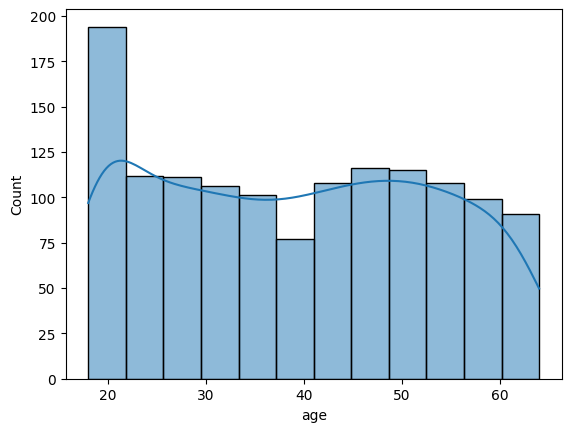

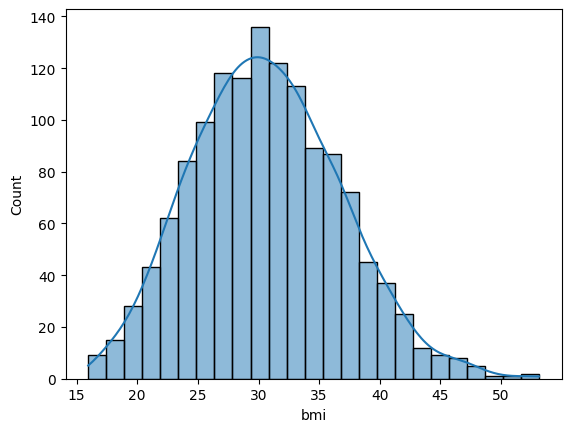

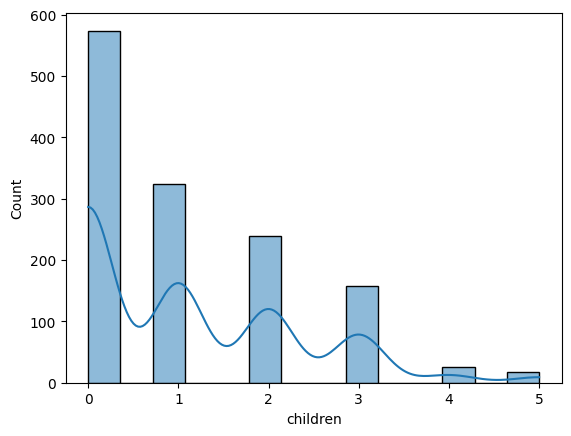

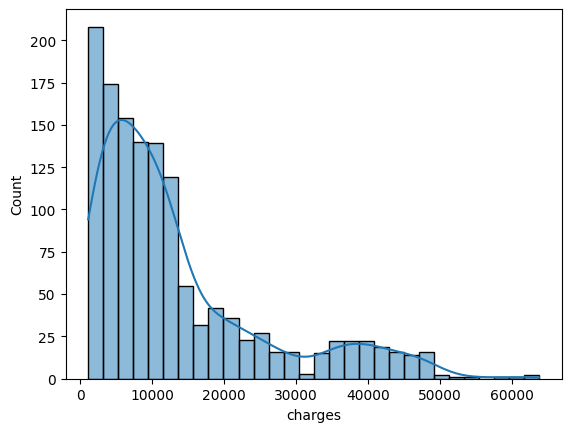

In [ ]:
numeric_columns = ['age', 'bmi', 'children', 'charges']
for col in numeric_columns:
  sns.histplot(df[col], kde=True)
  plt.show()

<Axes: xlabel='children', ylabel='count'>

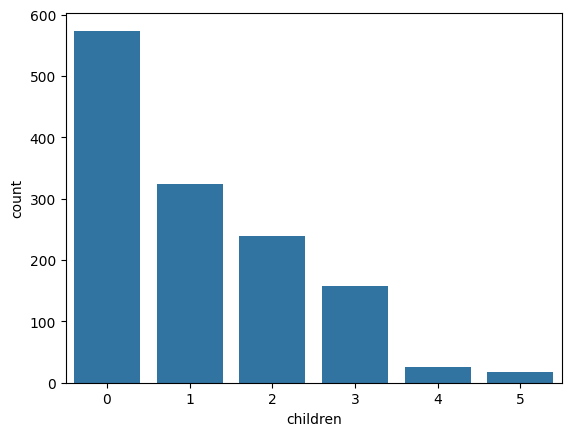

In [ ]:
sns.countplot(x = df['children'])

<Axes: xlabel='sex', ylabel='count'>

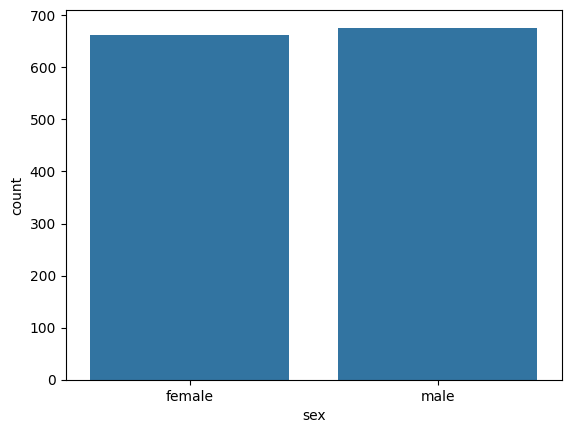

In [ ]:
sns.countplot(x = df['sex'])

<Axes: xlabel='smoker', ylabel='count'>

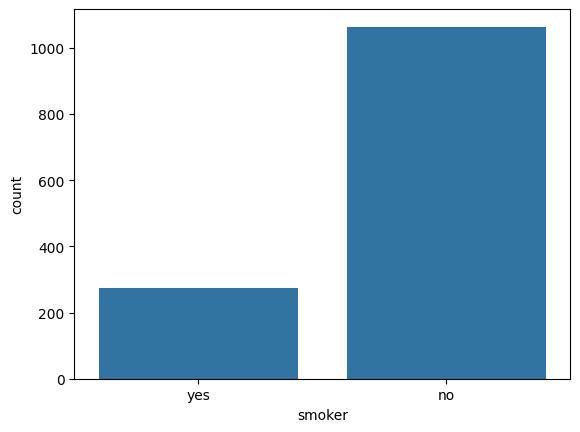

In [ ]:
sns.countplot(x = df['smoker'])

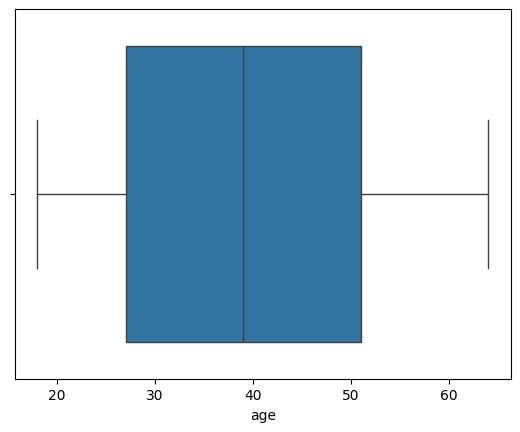

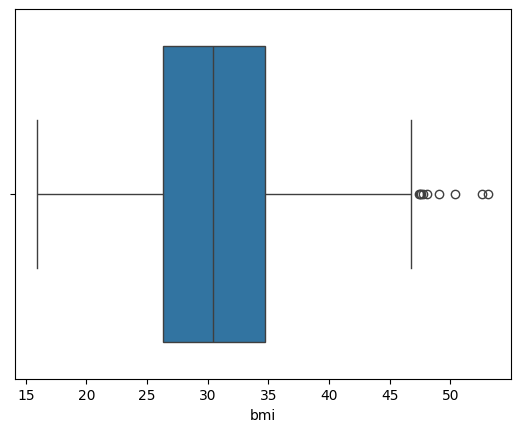

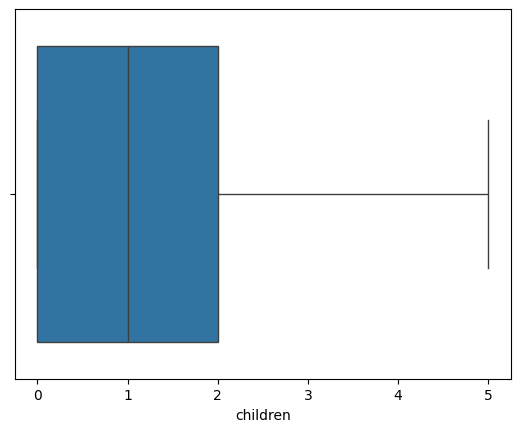

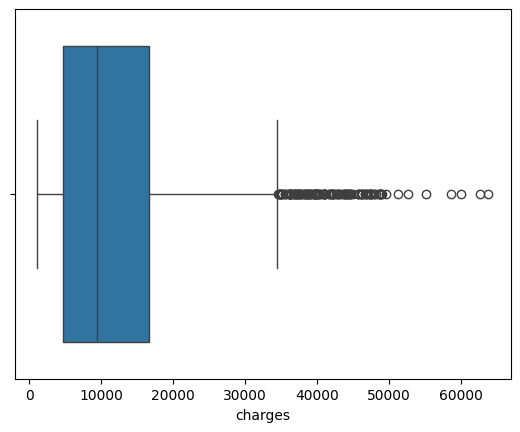

In [ ]:
for col in numeric_columns:
  sns.boxplot(x = df[col])
  plt.show()

<Axes: >

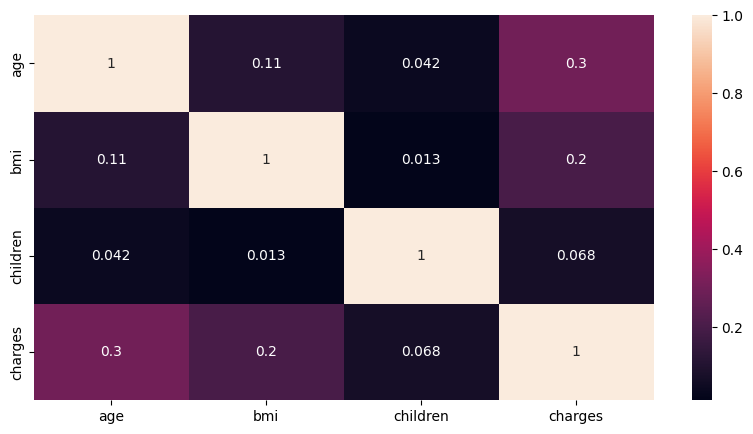

In [ ]:
plt.figure(figsize=(10,5))
sns.heatmap(df.corr(numeric_only=True), annot=True)

## Data Cleaning

In [ ]:
df_cleaned = df.copy()

In [ ]:
# Remove Null values
df_cleaned

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520
...,...,...,...,...,...,...,...
1333,50,male,30.970,3,no,northwest,10600.54830
1334,18,female,31.920,0,no,northeast,2205.98080
1335,18,female,36.850,0,no,southeast,1629.83350
1336,21,female,25.800,0,no,southwest,2007.94500


In [ ]:
# Delete Duplicate
df_cleaned.duplicated().sum()
df_cleaned.drop_duplicates(inplace=True)

In [ ]:
df.shape
df_cleaned.shape

(1337, 7)

In [ ]:
df_cleaned.dtypes

,0
age,int64
sex,object
bmi,float64
children,int64
smoker,object
region,object
charges,float64


In [ ]:
df_cleaned['sex'].value_counts()

,count
sex,
male,675
female,662


In [ ]:
# Labled encoding - Sex
df_cleaned['sex'] = df_cleaned['sex'].map({'male':0, 'female':1})


In [ ]:
# Labled encoding - smoker
# 1️⃣Check How many value are there
df_cleaned['smoker'].value_counts()

,count
smoker,
no,1063
yes,274


In [ ]:
# 2️⃣Labled encoding
df_cleaned['smoker'] = df_cleaned['smoker'].map({'yes':1,'no':0})


In [ ]:
df_cleaned.rename(columns={'sex':'is_female',
                           'smoker':'is_smoker'}, inplace=True)

In [ ]:
df_cleaned

,age,is_female,bmi,children,is_smoker,region,charges
0,19,1,27.900,0,1,southwest,16884.92400
1,18,0,33.770,1,0,southeast,1725.55230
2,28,0,33.000,3,0,southeast,4449.46200
3,33,0,22.705,0,0,northwest,21984.47061
4,32,0,28.880,0,0,northwest,3866.85520
...,...,...,...,...,...,...,...
1333,50,0,30.970,3,0,northwest,10600.54830
1334,18,1,31.920,0,0,northeast,2205.98080
1335,18,1,36.850,0,0,southeast,1629.83350
1336,21,1,25.800,0,0,southwest,2007.94500


In [ ]:
# One-hot encoding
df_cleaned['region'].value_counts()

,count
region,
southeast,364
southwest,325
northwest,324
northeast,324


In [ ]:
# One-hot encoding
df_cleaned = pd.get_dummies(df_cleaned, columns=['region'],drop_first=True)

In [ ]:
df_cleaned

,age,is_female,bmi,children,is_smoker,charges,region_northwest,region_southeast,region_southwest
0,19,1,27.900,0,1,16884.92400,False,False,True
1,18,0,33.770,1,0,1725.55230,False,True,False
2,28,0,33.000,3,0,4449.46200,False,True,False
3,33,0,22.705,0,0,21984.47061,True,False,False
4,32,0,28.880,0,0,3866.85520,True,False,False
...,...,...,...,...,...,...,...,...,...
1333,50,0,30.970,3,0,10600.54830,True,False,False
1334,18,1,31.920,0,0,2205.98080,False,False,False
1335,18,1,36.850,0,0,1629.83350,False,True,False
1336,21,1,25.800,0,0,2007.94500,False,False,True


In [ ]:
df_cleaned = df_cleaned.astype(int)

In [ ]:
df_cleaned

,age,is_female,bmi,children,is_smoker,charges,region_northwest,region_southeast,region_southwest
0,19,1,27,0,1,16884,0,0,1
1,18,0,33,1,0,1725,0,1,0
2,28,0,33,3,0,4449,0,1,0
3,33,0,22,0,0,21984,1,0,0
4,32,0,28,0,0,3866,1,0,0
...,...,...,...,...,...,...,...,...,...
1333,50,0,30,3,0,10600,1,0,0
1334,18,1,31,0,0,2205,0,0,0
1335,18,1,36,0,0,1629,0,1,0
1336,21,1,25,0,0,2007,0,0,1


### **Feature Engineering and Extraction**

<Axes: xlabel='bmi', ylabel='Count'>

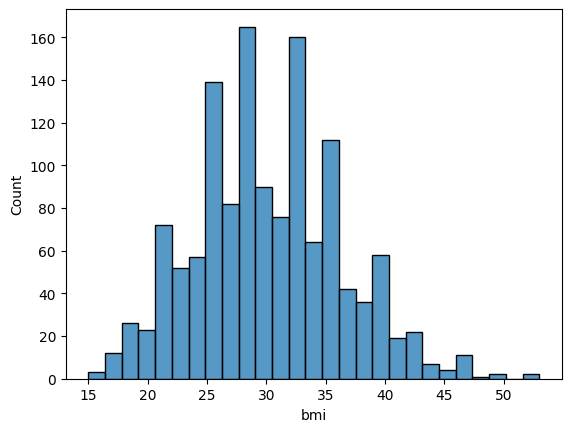

In [ ]:
sns.histplot(df_cleaned['bmi'])

In [ ]:
# Create a new column named -  bmi_category
df_cleaned['bmi_category'] = pd.cut(df_cleaned['bmi'], bins=[0, 18.5, 24.9, 29.9, float('inf')],labels=['Underweight', 'Normal', 'Overweight', 'Obese'])

In [ ]:
df_cleaned

,age,is_female,bmi,children,is_smoker,charges,region_northwest,region_southeast,region_southwest,bmi_category
0,19,1,27,0,1,16884,0,0,1,Overweight
1,18,0,33,1,0,1725,0,1,0,Obese
2,28,0,33,3,0,4449,0,1,0,Obese
3,33,0,22,0,0,21984,1,0,0,Normal
4,32,0,28,0,0,3866,1,0,0,Overweight
...,...,...,...,...,...,...,...,...,...,...
1333,50,0,30,3,0,10600,1,0,0,Obese
1334,18,1,31,0,0,2205,0,0,0,Obese
1335,18,1,36,0,0,1629,0,1,0,Obese
1336,21,1,25,0,0,2007,0,0,1,Overweight


In [ ]:
# Create a new columm named - age_category
bins = [0, 12, 19, 60, 100]
labels = ['Child', 'Teen', 'Adult', 'Senior']
df_cleaned['age_category'] = pd.cut(df_cleaned['age'],bins=bins,labels=labels)

In [ ]:
df_cleaned


,age,is_female,bmi,children,is_smoker,charges,region_northwest,region_southeast,region_southwest,bmi_category,age_category
0,19,1,27,0,1,16884,0,0,1,Overweight,Teen
1,18,0,33,1,0,1725,0,1,0,Obese,Teen
2,28,0,33,3,0,4449,0,1,0,Obese,Adult
3,33,0,22,0,0,21984,1,0,0,Normal,Adult
4,32,0,28,0,0,3866,1,0,0,Overweight,Adult
...,...,...,...,...,...,...,...,...,...,...,...
1333,50,0,30,3,0,10600,1,0,0,Obese,Adult
1334,18,1,31,0,0,2205,0,0,0,Obese,Teen
1335,18,1,36,0,0,1629,0,1,0,Obese,Teen
1336,21,1,25,0,0,2007,0,0,1,Overweight,Adult


In [ ]:
# One-hot encoding
df_cleaned = pd.get_dummies(df_cleaned,columns=['age_category','bmi_category'],drop_first=True)

In [ ]:
df_cleaned

,age,is_female,bmi,children,is_smoker,charges,region_northwest,region_southeast,region_southwest,age_category_Teen,age_category_Adult,age_category_Senior,bmi_category_Normal,bmi_category_Overweight,bmi_category_Obese
0,19,1,27,0,1,16884,0,0,1,True,False,False,False,True,False
1,18,0,33,1,0,1725,0,1,0,True,False,False,False,False,True
2,28,0,33,3,0,4449,0,1,0,False,True,False,False,False,True
3,33,0,22,0,0,21984,1,0,0,False,True,False,True,False,False
4,32,0,28,0,0,3866,1,0,0,False,True,False,False,True,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1333,50,0,30,3,0,10600,1,0,0,False,True,False,False,False,True
1334,18,1,31,0,0,2205,0,0,0,True,False,False,False,False,True
1335,18,1,36,0,0,1629,0,1,0,True,False,False,False,False,True
1336,21,1,25,0,0,2007,0,0,1,False,True,False,False,True,False


In [ ]:
df_cleaned = df_cleaned.astype(int)

# **Feature Scaling**

In [ ]:
df_cleaned.columns

Index(['age', 'is_female', 'bmi', 'children', 'is_smoker', 'charges',
       'region_northwest', 'region_southeast', 'region_southwest',
       'age_category_Teen', 'age_category_Adult', 'age_category_Senior',
       'bmi_category_Normal', 'bmi_category_Overweight', 'bmi_category_Obese'],
      dtype='object')

In [ ]:
from sklearn.preprocessing import StandardScaler
cols = ['age', 'bmi', 'children']
scaler = StandardScaler()
df_cleaned[cols] = scaler.fit_transform(df_cleaned[cols])

In [ ]:
df_cleaned

,age,is_female,bmi,children,is_smoker,charges,region_northwest,region_southeast,region_southwest,age_category_Teen,age_category_Adult,age_category_Senior,bmi_category_Normal,bmi_category_Overweight,bmi_category_Obese
0,-1.440418,1,-0.517949,-0.909234,1,16884,0,0,1,1,0,0,0,1,0
1,-1.511647,0,0.462463,-0.079442,0,1725,0,1,0,1,0,0,0,0,1
2,-0.799350,0,0.462463,1.580143,0,4449,0,1,0,0,1,0,0,0,1
3,-0.443201,0,-1.334960,-0.909234,0,21984,1,0,0,0,1,0,1,0,0
4,-0.514431,0,-0.354547,-0.909234,0,3866,1,0,0,0,1,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1333,0.767704,0,-0.027743,1.580143,0,10600,1,0,0,0,1,0,0,0,1
1334,-1.511647,1,0.135659,-0.909234,0,2205,0,0,0,1,0,0,0,0,1
1335,-1.511647,1,0.952670,-0.909234,0,1629,0,1,0,1,0,0,0,0,1
1336,-1.297958,1,-0.844753,-0.909234,0,2007,0,0,1,0,1,0,0,1,0


In [ ]:
# Pearson Correlation Calculation
from scipy.stats import pearsonr
selected_features = ['age', 'is_female', 'bmi', 'children', 'is_smoker', 'region_northwest', 'region_southeast', 'region_southwest','bmi_category_Normal', 'bmi_category_Overweight', 'bmi_category_Obese']
correlations={
    feature:pearsonr(df_cleaned[feature],df_cleaned['charges'])[0]
    for feature in selected_features
}

Perfect 👍 let’s walk through what your code is doing step by step.

---

### 🔹 Step 1: Import Pearson correlation

```python
from scipy.stats import pearsonr
```

* `pearsonr(x, y)` computes the **Pearson correlation coefficient (r)** and **p-value** between two continuous variables.
* It returns a tuple `(r, p_value)`:

  * `r` → strength & direction of linear relationship (between `-1` and `+1`)
  * `p_value` → significance of that correlation

---

### 🔹 Step 2: Define features

```python
selected_features = [
    'age', 'is_female', 'bmi', 'children', 'is_smoker',
    'region_northwest', 'region_southeast', 'region_southwest',
    'bmi_category_Normal', 'bmi_category_Overweight', 'bmi_category_Obese'
]
```

* These are the independent variables (features) you want to test correlation against the target **`charges`**.
* Notice you included:

  * **Numeric features** → `age`, `bmi`, `children`
  * **Binary encoded features** → `is_female`, `is_smoker`
  * **One-hot encoded features** → regions, BMI categories

---

### 🔹 Step 3: Dictionary comprehension

```python
correlations = {
    feature: pearsonr(df_cleaned[feature], df_cleaned['charges'])[0]
    for feature in selected_features
}
```

* For each `feature` in your list:

  * Compute `pearsonr(df_cleaned[feature], df_cleaned['charges'])`
  * `[0]` extracts only the **correlation coefficient (r)**, ignoring the p-value.
* Store results in a dictionary with `feature` as key and correlation value as value.

---

### 🔹 Example Output (hypothetical)

```python
{
  'age': 0.30,
  'is_female': -0.04,
  'bmi': 0.20,
  'children': 0.07,
  'is_smoker': 0.78,
  'region_northwest': -0.04,
  'region_southeast': 0.07,
  'region_southwest': -0.09,
  'bmi_category_Normal': -0.10,
  'bmi_category_Overweight': 0.12,
  'bmi_category_Obese': 0.20
}
```

---

### ✅ Interpretation

* **`is_smoker` (0.78)** → strong positive correlation → smokers pay much higher charges.
* **`age` (0.30)** → weak-moderate positive correlation → older people tend to have higher charges.
* **`bmi` (0.20)** → weak positive correlation → higher BMI → slightly higher charges.
* **`is_female` (-0.04)** → near zero → almost no difference in charges by gender.
* **Regions** → correlations close to zero → region doesn’t strongly affect charges.
* **BMI categories** → weak positive/negative, indicating some influence but not strong.

---

✅ **In short:**
This code calculates how strongly each feature is **linearly correlated** with medical `charges`. The result tells you which features are more important predictors for regression models.

---

Do you want me to also show you how to include the **p-value** from `pearsonr` (so you can check if correlations are statistically significant)?



In [ ]:
correlation_df = pd.DataFrame(correlations,index=['correlation']).T
correlation_df.sort_values(by='correlation',ascending=False)

,correlation
is_smoker,0.787234
age,0.298309
bmi_category_Obese,0.200348
bmi,0.196236
region_southeast,0.073577
children,0.067390
region_northwest,-0.038695
region_southwest,-0.043637
is_female,-0.058046
bmi_category_Normal,-0.104042


In [ ]:
category_feature=['is_female','is_smoker','region_northwest','region_southeast','region_southwest','bmi_category_Normal','bmi_category_Overweight','bmi_category_Obese']


In [ ]:
from scipy.stats import chi2_contingency

alpha = 0.05

df_cleaned['charges_bin'] = pd.qcut(df_cleaned['charges'], q=4, labels=False)
chi_results = {}

for feature in category_feature:
    contingency_table = pd.crosstab(df_cleaned[feature], df_cleaned['charges_bin'])
    chi2, p, dof, expected = chi2_contingency(contingency_table)
    decision = 'Fail to Reject H0(Not keep)'
    if p < alpha:
        decision = 'Reject H0(keep)'
    chi_results[feature] = {
        'chi2': chi2,
        'p': p,
        'decision': decision
    }

chi_results_df = pd.DataFrame(chi_results).T
chi_results_df.sort_values(by='p', ascending=True)
chi_results_df

,chi2,p,decision
is_female,10.258784,0.01649,Reject H0(keep)
is_smoker,848.219178,0.0,Reject H0(keep)
region_northwest,1.13424,0.768815,Fail to Reject H0(Not keep)
region_southeast,15.998167,0.001135,Reject H0(keep)
region_southwest,5.091893,0.165191,Fail to Reject H0(Not keep)
bmi_category_Normal,3.708088,0.29476,Fail to Reject H0(Not keep)
bmi_category_Overweight,4.25149,0.235557,Fail to Reject H0(Not keep)
bmi_category_Obese,8.515711,0.036473,Reject H0(keep)


In [ ]:
final_df = df_cleaned[['age','is_female','bmi','children','is_smoker','charges','region_southeast','bmi_category_Obese']]

In [ ]:
final_df

,age,is_female,bmi,children,is_smoker,charges,region_southeast,bmi_category_Obese
0,-1.440418,1,-0.517949,-0.909234,1,16884,0,0
1,-1.511647,0,0.462463,-0.079442,0,1725,1,1
2,-0.799350,0,0.462463,1.580143,0,4449,1,1
3,-0.443201,0,-1.334960,-0.909234,0,21984,0,0
4,-0.514431,0,-0.354547,-0.909234,0,3866,0,0
...,...,...,...,...,...,...,...,...
1333,0.767704,0,-0.027743,1.580143,0,10600,0,1
1334,-1.511647,1,0.135659,-0.909234,0,2205,0,1
1335,-1.511647,1,0.952670,-0.909234,0,1629,1,1
1336,-1.297958,1,-0.844753,-0.909234,0,2007,0,0


,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520
...,...,...,...,...,...,...,...
1333,50,male,30.970,3,no,northwest,10600.54830
1334,18,female,31.920,0,no,northeast,2205.98080
1335,18,female,36.850,0,no,southeast,1629.83350
1336,21,female,25.800,0,no,southwest,2007.94500
